In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import argparse
from google.colab.patches import cv2_imshow

path = "/content/drive/MyDrive/master/一上/嵌入式智慧影像分析與實境界面/作業/hw5/picture/"

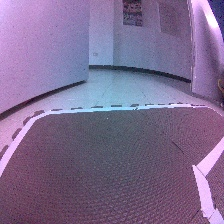

In [3]:
filename = path+"go_straight.jpg"     #與程式碼相同位置的檔案
filename2 = path+"turn_right.jpg"
filename3 = path+"turn_right_now.jpg"
image = cv2.imread(filename3)      #讀取照片
cv2_imshow(image)  #顯示照片

遮罩

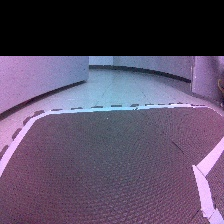

In [4]:
def doMask(pic):
  # 建立矩形區域，填充白色255
  rectangle = np.zeros(pic.shape[0:2], dtype="uint8")
  cv2.rectangle(rectangle, (0, 224), (224, 56), 255, -1) # 修改這裡

  # 使用mask
  mask = rectangle

  # Apply out mask -- notice how only the person in the image is cropped out
  masked = cv2.bitwise_and(pic, pic, mask=mask)
  cv2_imshow(masked)

  return masked

s = doMask(image)

2層高斯模糊+canny

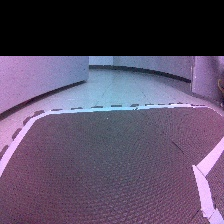

In [5]:
def Gaussian(pic):
  return cv2.GaussianBlur(pic, (7, 7), 0)


# 參考opencv -> Matplotlib
# https://blog.gtwang.org/programming/opencv-basic-image-read-and-write-tutorial/


def model():
  # 使用 OpenCV 讀取圖檔
  # img_bgr = cv2.imread(filename)
  masked = doMask(image)

  dst = Gaussian(masked)
  dst = Gaussian(dst)
  canny = cv2.Canny(dst, 30, 150)
  return canny

canny = model()


型態學

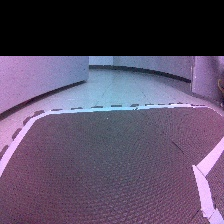

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


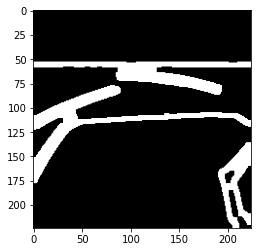

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))

# # #開運算  
# opened = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel) 

# cv2_imshow(opened)

# # #閉運算  
# closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)  
  
# cv2_imshow(closed)
  
# #腐蝕影象  
# eroded = cv2.erode(canny, kernel)  
# #顯示腐蝕後的影象  
# cv2_imshow(eroded) 
  
# #膨脹影象  
# dilated = cv2.dilate(canny, kernel)  
# #顯示膨脹後的影象  
# cv2_imshow(dilated)  

# #膨脹影象 + 閉運算
# dilated = cv2.dilate(canny, kernel) 
# dilated_closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
# #顯示膨脹後的影象  
# cv2_imshow(dilated_closed)  

# #閉運算 + 膨脹影象 
# closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel) 
# dilated = cv2.dilate(closed, kernel) 
# #顯示膨脹後的影象  
# cv2_imshow(dilated)

# #二值化
# ret, threshold = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)
# # cv2_imshow(threshold)
# plt.imshow(threshold, cmap='Greys_r')
# # print(threshold)

# # for i in threshold:
# #   for j in i:
# #     if j != 0 and j != 255:
# #       print(j)
# #       break

# # plt.imshow(canny, cmap='Greys_r')

def dilated_closed():
  canny = model()
  dilated = cv2.dilate(canny, kernel) 
  dilated_closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

  return dilated_closed

def threshold(pic):
  #二值化
  ret, threshold = cv2.threshold(pic, 127, 1, cv2.THRESH_BINARY)
  plt.imshow(threshold, cmap='Greys_r')

  return threshold

t = threshold(dilated_closed())

print(t[0])
with open('output.txt', 'w') as f:
  for item in t:
    for i in item:
      f.write("%s" % i)
    f.write("\n")

In [7]:
rightY = 223
leftY = 223

def findLeft(y, pic):
  while True:
    for j1 in range(111,0,-1):
      if pic[y][j1] == 255:
        return j1,y

    y -= 1
def findRight(y, pic):
  while True:
    for j2 in range(113,224):
      if pic[y][j2] == 255:
        return j2,y

    y -= 1

def findPoint(y, xlist, pic):
  for j2 in xlist:
    if pic[y][j2] == 255 or j2 == 223 or j2 == 0:
      return j2,y

def findTPoint(y, xlist, pic):
  for j2 in xlist:
    if j2 == 223 or j2 == 0 or y < 60:
      return -1,-1
    elif pic[y][j2] == 255:
      return j2,y
    

def findMidPointList(datumList, mapList, indexDatumList, indexMapList):
  midpointList = []
  for i in range(len(datumList)):
    # midx = int((leftPoint[0] + rightPoint[0]) / 2)
    # midy = int((leftPoint[1] + rightPoint[1]) / 2)
    midx = int((datumList[indexDatumList[i]][0] + mapList[indexMapList[i]][0]) / 2)
    midy = int((datumList[indexDatumList[i]][1] + mapList[indexMapList[i]][1]) / 2)

    midpoint = (midx,midy)

    midpointList.append(midpoint)
  return midpointList

In [8]:
#找到左右各找到第一點不為0版+若該行找不到則該邊的Y值-1，直到找到第一點(中點以上一次中點的X座標當作下一次的基準) 失敗
def findMidPoint():
  midpointList = []
  left = findLeft(223)
  right = findRight(223)
  print(left)
  print(right)

  cv2.line(dilated_closed, left, right, (255, 255, 255), 5)
  plt.imshow(dilated_closed, cmap='Greys_r')

  midx = (left[0] + right[0]) / 2
  midy = (left[1] + right[1]) / 2

  midpoint = (midx,midy)

  midpointList.append(midpoint)

In [9]:
##找到左右找到第一點不為0+若該行找不到則以邊界為255(中點以上一次中點的X座標當作下一次的基準)
def findMidPoint2(pic):
  # pic = dilated_closed()
  midpointList = []
  midX = 112
  for i in range(223,56,-1):
    #若中點太靠近邊線則中斷
    if midX > 213 or midX < 10:
      break

    leftList = range(int(midX-1),-1,-1)
    rightList = range(int(midX+1),224)
    leftPoint = findPoint(i,leftList,pic)
    rightPoint = findPoint(i,rightList,pic)

    midx = int((leftPoint[0] + rightPoint[0]) / 2)
    midy = int((leftPoint[1] + rightPoint[1]) / 2)

    midpoint = (midx,midy)

    midpointList.append(midpoint)

    #讓下一次迴圈的中點落在上一次的中點
    midX = midx

  return midpointList

In [10]:
#左右各找一條線，存放至各自的list中，若找不到(len=0)，則取出有值list中的其中10點，與左/右下的角落點，做出中點list，若兩邊皆有找到，則以等比關係找到中點list
def findMidPoint3(pic):
  midL = 112
  midR = 112
  leftStop = False
  rightStop = False
  leftPointList = []
  rightPointList = []
  indexDatumList = []
  indexMapList = []

  #找到left point List & right point List
  for i in range(223,56,-1):
    if not leftStop:
      leftList = range(int(midL-1),-1,-1)
      # if i == 107:
      #   print(leftList)
      leftPoint = findTPoint(i,leftList,pic)
      if leftPoint[0] != -1:
        leftPointList.append(leftPoint)
        midL = round((leftPoint[0] + 223) / 2)+1
      elif len(leftPointList) != 0:
        leftStop = True
        

    if not rightStop:
      rightList = range(int(midR+1),224)
      rightPoint = findTPoint(i,rightList,pic)
      if rightPoint[0] != -1:
        rightPointList.append(rightPoint)
        midR = round(rightPoint[0] / 2)-1
      elif len(rightPoint) != 0:
        rightStop = True
        

  datumList, mapList, indexDatumList, indexMapList = getDatumAndMap(rightPointList, leftPointList)
    
  midPointList = findMidPointList(datumList, mapList, indexDatumList, indexMapList)

  return midPointList, datumList[0], mapList[0]

In [11]:
def getDatumAndMap(rightPointList, leftPointList):
  indexDatumList = []
  indexMapList = []

  datumList = rightPointList if len(rightPointList) < len(leftPointList) else leftPointList
  mapList = leftPointList if len(rightPointList) < len(leftPointList) else rightPointList
  if len(datumList) != 0 and len(mapList) != 0 :
    
    ratio = int(len(mapList) / len(datumList))
    midPointList = []

    #如果兩邊point數量皆足夠
    if len(datumList) > 10 and len(mapList) > 10 :
      if ratio >= 2:
        indexDatumList = range(len(datumList))
        indexMapList = range(0,len(mapList),ratio)      
      else:
        indexDatumList = range(len(datumList))
        indexMapList = range(len(datumList))

    elif len(datumList) <= 10 and len(mapList) <= 10 :
      #理論上是不會遇到
      print("error: all lower than 10")
      raise "error: all lower than 10"
    elif len(datumList) <= 10:
      #補齊10個點
      indexDatumList = []
      indexMapList = []
      for i in range(1,11):
        indexDatumList.append(int(len(datumList) * 0.1 * i))
        indexMapList.append(int(len(indexMapList) * 0.1 * i))

  elif len(datumList) == 0 and len(mapList) == 0:
    #理論上是不會遇到
    print("error: all equal 0")
    raise "error: all equal 0"
  elif len(datumList) == 0:
    if datumList == leftPointList:
      datumList.append((0,223))

      for i in range(1,11):
        indexDatumList.append(0)
        indexMapList.append(int(len(indexMapList) * 0.1 * i))
    else:
      datumList.append((223,223))

      for i in range(1,11):
        indexDatumList.append(0)
        indexMapList.append(int(len(indexMapList) * 0.1 * i))

  return datumList, mapList, indexDatumList, indexMapList
      

In [12]:
def findMidPoint4(pic):

  leftLine = []
  rightLine = []

  ly, lx = findLeft(223,pic)
  ry, rx = findRight(223,pic)

  #constraint 用來表示z=(x,y)相鄰九宮格座標的優先順序
  #constraint_left 5 4 3   constraint_right  3 4 5
  #         6 z 2   #          2 z 6
  #         7 8 1   #          1 8 7
  constraint_left = [(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1),(1,0)]
  constraint_right = [(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1),(0,1),(1,1),(1,0)]

  leftLine = findLine(pic, (lx, ly), leftLine, constraint_left)
  rightLine = findLine(pic, (rx, ry), rightLine, constraint_right)

  return leftLine, rightLine

In [13]:
import queue

def findLine(pic, point, line, constraint):
    #廣度優先

    width = queue.Queue()
    width.put(point)
    line.append(point)

    while not width.empty():

      point = width.get()

      x = point[0]
      y = point[1]

      
      for cons in constraint:
        if (x+cons[0]) > 223 or (x+cons[0]) < 56 or y+cons[1] < 0 or y+cons[1] > 223:
          continue
        # print("pic[{}][{}] = {}".format(x+cons[0], y+cons[1], pic[x+cons[0]][y+cons[1]]))
        if pic[x+cons[0]][y+cons[1]] == 255 and testNineSquare(pic, (x+cons[0], y+cons[1])) and (x+cons[0], y+cons[1]) not in line:
          # print("enter")

          line.append((x+cons[0], y+cons[1]))
          width.put((x+cons[0], y+cons[1]))

    return line

def testNineSquare(pic, point):
  constraint = [(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1),(0,1)]

  count = 0
  x = point[0]
  y = point[1]
  for cons in constraint:
    if (x+cons[0]) > 223 or (x+cons[0]) < 56 or y+cons[1] < 0 or y+cons[1] > 223:
      continue
    if pic[x+cons[0]][y+cons[1]] == 0:
      count += 1
  
  return count > 0


將findMidPoint畫出

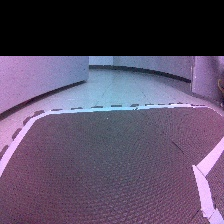

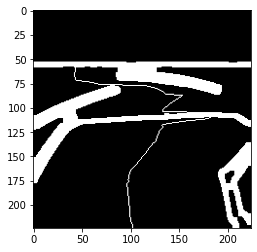

In [14]:
def print2():
  pic = dilated_closed()
  midpointList = findMidPoint2(pic) 

  for i in range(len(midpointList)-1):
    cv2.line(pic, midpointList[i], midpointList[i+1], (255, 255, 255), 1)

  plt.imshow(pic, cmap='Greys_r')

print2()

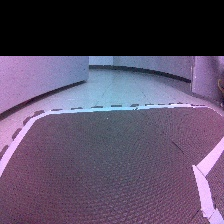

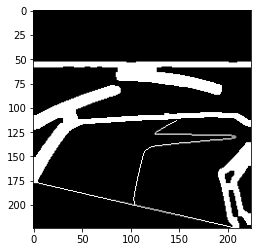

In [15]:
def print3():
  pic = dilated_closed()
  midpointList, v1, v2 = findMidPoint3(pic)

  methodThree = cv2.line(pic, v1, v2, (255, 255, 255), 1)
  for i in range(len(midpointList)-1):
    cv2.line(pic, midpointList[i], midpointList[i+1], (255, 255, 255), 1)

  plt.imshow(pic, cmap='Greys_r')

print3()

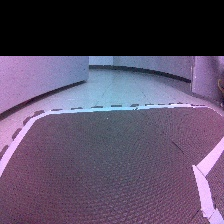

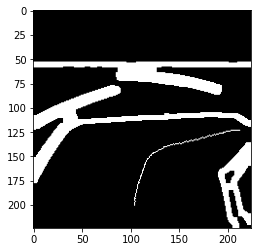

In [16]:
def print4():
  pic = dilated_closed()
  leftLine, rightLine = findMidPoint4(pic)

  datumList, mapList, indexDatumList, indexMapList = getDatumAndMap(leftLine, rightLine)
  midPointList = findMidPointList(datumList, mapList, indexDatumList, indexMapList)

  for i in range(len(midPointList)-1):
    y,x = midPointList[i]
    y2,x2 = midPointList[i+1]
    cv2.line(pic, (x,y), (x2,y2), (255, 255, 255), 1)

  plt.imshow(pic, cmap='Greys_r')

print4()